### Деревья решений

*Дерево решений (решающее дерево, decision tree)* – это модель, представляющая собой совокупность правил для принятия решений.

Деревья решений:
- позволяют решать задачи классификации и регрессии  
- подходят для решения линейных и нелинейных задач  
- легко интерпретируемы  
- не требуют подготовки данных (нормализации или стандартизации)  
- осуществляют отбор признаков  
- легко переобучается  

**Рассмтрим деревья решений для задач классификации**

В наиболее простом виде дерево решений – это способ представления
правил в иерархической, последовательной структуре. Основа такой структуры –
ответы "Да" или "Нет" на ряд вопросов. При этом, задаваемый вопрос на каждом последующем иерархическом уровне зависит от ответа, полученного на предыдущем уровне.

![img](https://habrastorage.org/getpro/habr/upload_files/476/3a4/023/4763a4023eecc0c33289aa195cf6e147)

Моменты принятия решений соответствуют так называемым узлам (nodes). В узлах происходит ветвление процесса (branching), т.е. деление его на так называемые ветви (branches) в зависимости от сделанного выбора. Конечные узлы называют листьями (leafs, leaf nodes). Каждый лист – это конечный результат последовательного принятия решений.
Данные, подлежащие классификации, находятся в так называемом «корне» дерева (root). В зависимости от решения, принимаемого в узлах, процесс в конце концов останавливается в
одном из листьев, где переменной отклика (искомому номеру класса) присваивается то или иное значение.

В Sklearn деревья решений реализованы в модуле tree: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

Деревья решений для классификации: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  
        
Деревья решений для регрессии: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

В настоящее время разработано большое количество алгоритмов построения деревьев решений: ID3, CART, C4.5, C5.0, NewId, ITrule, CHAID, CN2 и т.д. 
В Sklearn используется CART.

*Как происходит построение дерева?*

В примере "Выдавать ли кредит?" мы видели, что решение о выдаче кредита принималось на основе возраста, кредитной истории, наличия бизнес-плана и др. Но
какой признак выбрать первым? Какие использовать в следующих узлах?

*Общее правило*: Выбранный признак должен разбить множество объектов в узле так, чтобы получившиеся подмножества содержали объекты с одинаковыми метками класса, или были максимально приближены к этому. Для этого используются различные критерии (энтропия, мера неоднородности Джини, ошибка классификации).    

Теоретически можно построить дерево, в котором для каждого объекта будет создан отдельный лист. Скорее всего, такое дерево окажется бесполезным, поскольку оно будет переобученным. Решением проблемы является принудительная остановка построения дерева, пока оно не стало переобученным. Для этого используются следующие подходы:  
- Ранняя остановка – алгоритм будет остановлен, как только будет достигнуто заданное значение некоторого критерия, например процентной доли правильно классифицированных объектов.  
- Ограничение глубины дерева – задание максимального числа разбиений в ветвях, по достижении которого обучение останавливается (может привести к снижению качества дерева).  
- Ограничение минимального числа объектов в листе.  
- Ограничение максимального количества листьев в дереве.  


Альтернативный метод борьбы с переобучением - *отсечение ветвей (pruning)*:  
1. Построить полное дерево (максимально переобученное).  
2. Определить критерий, в соответствии с которым нужно убирать (стричь) листья. Например, можно стричь дерево пока улучшается качество на тестовой выборке.
3. Стричь дерево!

Стрижки редко используются и не реализованы в большинстве библиотек для анализа данных. Причина заключается
в том, что деревья сами по себе являются слабыми алгоритмами и чаще они используются в композициях, где достаточно простых критериев остановки.

##### Рассмотрим пример:

Класс DecisionTreeClassifier  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  
Параметры (гиперпараметры):
- criterion - критерий расщепления (по умолчанию gini - Джини)  
- max_depth - максимальная глубина дерева 
- min_samples_split - минимальное количество объектов, необходимое для разделения узла  
- min_samples_leaf - минимальное количество объектов в листе

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('titanic.xlsx')
df

,survived,pclass,sex,age,alone
0,0,3,1,22.0,0
1,1,1,0,38.0,0
2,1,3,0,26.0,1
3,1,1,0,35.0,0
4,0,3,1,35.0,1
...,...,...,...,...,...
709,0,3,0,39.0,0
710,0,2,1,27.0,1
711,1,1,0,19.0,1
712,1,1,1,26.0,1


In [3]:
X = df.drop('survived', axis = 1)
y = df['survived']

In [4]:
y.value_counts()
# 0 - не выжил
# 1 - выжил

0    424
1    290
Name: survived, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

# Разбиваем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
y_train.value_counts()

0    298
1    201
Name: survived, dtype: int64

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 2) # максимальная глубина дерева 2
dtc.fit(X_train, y_train) # Обучаем 

DecisionTreeClassifier(max_depth=2)

In [8]:
from sklearn.metrics import classification_report
y_pred = dtc.predict(X_test) # Предсказываем метки классов для тестового набора
print(classification_report(y_test, y_pred)) # Оценим качество

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       126
           1       0.91      0.54      0.68        89

    accuracy                           0.79       215
   macro avg       0.83      0.75      0.76       215
weighted avg       0.81      0.79      0.77       215



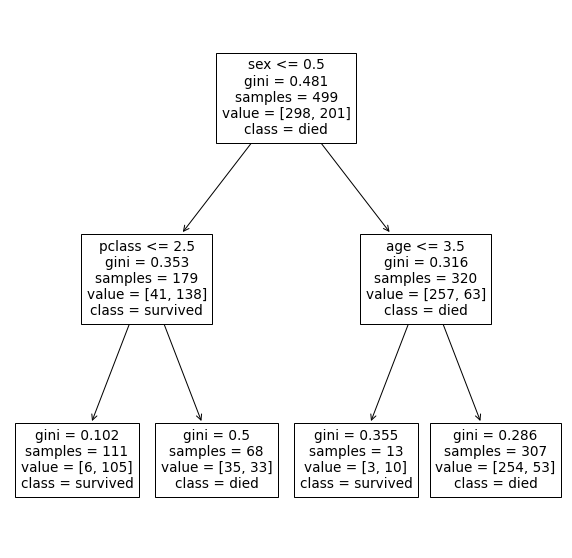

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Функция для отображения дерева
plt.figure(figsize=(10,10)) 
plot_tree(dtc, feature_names = X.columns, class_names = ['died', 'survived'])
plt.show()

In [10]:
dtc.feature_importances_ # Важность признаков

array([0.17470616, 0.73862343, 0.08667041, 0.        ])

In [11]:
X_train['sex'].value_counts()

1    320
0    179
Name: sex, dtype: int64

In [12]:
X_train['age'].min(), X_train['age'].max()

(0.67, 80.0)